In [1]:
from llava.mm_utils import process_images, text_to_input_ids
from models import LLaVA, LLaVA2, BLIP2
from run_llava import run_LLaVA
from datasets_loader import LLAVA2Dataset
import argparse
from PIL import Image
from tqdm.notebook import tqdm
from transformers import AutoProcessor

/home/scui/anaconda3/envs/adv_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Args:
    def __init__(self, model_name="liuhaotian/llava-v1.5-13b",
                image_folder="/groups/sernam/datasets/coco/trainval2014",
                conv_mode="vicuna_v1_1",
                subset=5,
                task="classification",
                dataset="coco",
                num_chunks=1,
                chunk_idx=0,
                llava_temp=0.2,
                top_p=None,
                num_beams=1,
                query='What is the main object in this image?\nAnswer the question in one word or phrase.'):

        self.model_name = model_name
        self.image_folder = image_folder
        self.conv_mode = conv_mode
        self.subset = subset
        self.task = task
        self.dataset = dataset
        self.num_chunks = num_chunks
        self.chunk_idx = chunk_idx
        self.llava_temp = llava_temp
        self.top_p = top_p
        self.num_beams = num_beams
        self.query = query

def test_llava2_prompt(model, path, query):
    query = query
    image = Image.open(path)
    answer = model.generate(process_images([image], model.image_processor, model.model.config)[0], text_to_input_ids(query, model).unsqueeze(0))
    display(image)
    display(answer)

In [16]:
llava2 = LLaVA2(Args())

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading checkpoint shards: 100%|██████████| 3/3 [00:25<00:00,  8.65s/it]
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 32000. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


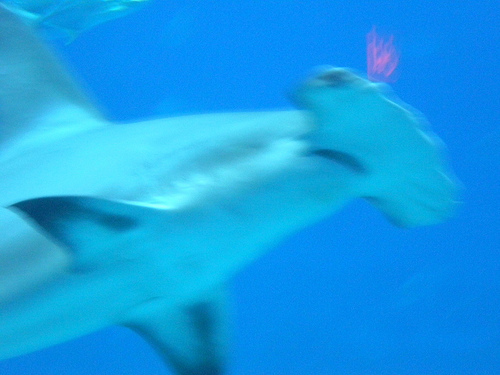

'Shark'

In [27]:
test_prompt(llava2, "/groups/sernam/datasets/imagenet/val/ILSVRC2012_val_00012879.JPEG", "What is the main object in this image? Answer the question in one word or phrase.")

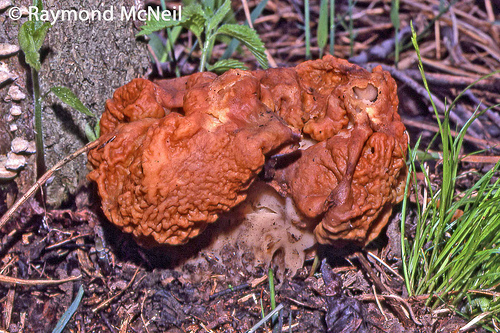

'Mushroom'

In [28]:

test_prompt(llava2, "/groups/sernam/datasets/imagenet/val/ILSVRC2012_val_00043208.JPEG", "What is the main object in this image? Answer the question in one word or phrase.")

In [30]:
llava = LLaVA(Args())

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Loading checkpoint shards: 100%|██████████| 3/3 [00:55<00:00, 18.61s/it]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [1]:
from transformers import Blip2Model, Blip2ForConditionalGeneration
import torch

/home/scui/anaconda3/envs/adv_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2Model.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
model.to('cuda')

NameError: name 'AutoProcessor' is not defined

In [5]:
blip2 = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", low_cpu_mem_usage=True, torch_dtype=torch.float16).cuda().eval()

Loading checkpoint shards: 100%|██████████| 2/2 [00:28<00:00, 14.25s/it]


In [12]:
blip2model = Blip2Model.from_pretrained("Salesforce/blip2-opt-2.7b", low_cpu_mem_usage=True, torch_dtype=torch.float16).cuda().eval()

Loading checkpoint shards: 100%|██████████| 2/2 [00:29<00:00, 14.56s/it]


In [14]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
image = Image.open(requests.get(url, stream=True).raw)

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)

In [3]:
blip2 = BLIP2(Args(model_name="Salesforce/blip2-opt-2.7b", query="What is the main object in this image? Answer the question in one word or phrase."))


Loading checkpoint shards: 100%|██████████| 2/2 [00:17<00:00,  8.57s/it]


RuntimeError: No CUDA GPUs are available

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig
import torch
torch.manual_seed(1234)

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL", trust_remote_code=True)

# use bf16
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="auto", trust_remote_code=True, bf16=True).eval()
# use fp16
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="auto", trust_remote_code=True, fp16=True).cuda().eval()
# use cpu only
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="cpu", trust_remote_code=True).eval()
# use cuda device
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL", device_map="cuda", trust_remote_code=True).eval()


A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL:
- visual.py
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Loading checkpoint shards: 100%|██████████| 10/10 [00:34<00:00,  3.48s/it]


In [4]:
model


QWenLMHeadModel(
  (transformer): QWenModel(
    (wte): Embedding(151936, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (rotary_emb): RotaryEmbedding()
    (h): ModuleList(
      (0-31): 32 x QWenBlock(
        (ln_1): RMSNorm()
        (attn): QWenAttention(
          (c_attn): Linear(in_features=4096, out_features=12288, bias=True)
          (c_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (attn_dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): RMSNorm()
        (mlp): QWenMLP(
          (w1): Linear(in_features=4096, out_features=11008, bias=False)
          (w2): Linear(in_features=4096, out_features=11008, bias=False)
          (c_proj): Linear(in_features=11008, out_features=4096, bias=False)
        )
      )
    )
    (ln_f): RMSNorm()
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 1664, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (ln_pre): LayerNorm((1664,), eps=1e-06, elementwise_affine=True)
      (tran

In [6]:
for name, param in model.transformer.named_children():
    print(name)

wte
drop
rotary_emb
h
ln_f
visual


In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor

/home/scui/anaconda3/envs/adv_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/scui/anaconda3/envs/adv_env/lib/python3.9/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


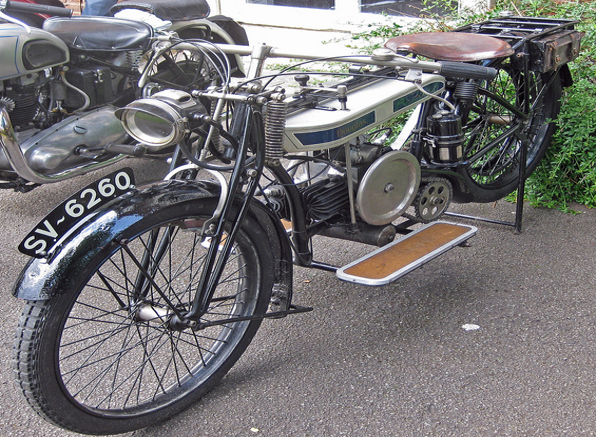

In [3]:
raw_image = Image.open("/groups/sernam/datasets/coco/val2014/COCO_val2014_000000000073.jpg").convert("RGB")
display(raw_image.resize((596, 437)))

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"


In [6]:
text = ['A photo of motocycle', 'A photo of cat']
model, vis_processors, text_processors = load_model_and_preprocess("blip2_image_text_matching", "pretrain", device=device, is_eval=True)


In [9]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](text[0])

In [11]:
text_processors["eval"](text[0])


'a photo of motocycle'

In [15]:
itm_output = model({"image": img, "text_input": txt}, match_head="itm")

In [16]:
itm_output

tensor([[ 0.2889, -0.2938]], device='cuda:0', grad_fn=<MeanBackward1>)

In [17]:
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)

In [18]:
itm_scores

tensor([[0.6417, 0.3583]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [19]:
itm_output = model({"image": img, "text_input": 'a photo of cat'}, match_head="itm")


In [21]:
torch.nn.functional.softmax(itm_output, dim=1)

tensor([[0.9988, 0.0012]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [26]:
itc_score = model({"image": img, "text_input": text}, match_head='itc')
itc_score

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [27]:
text_processors["eval"](text[0])

'a photo of motocycle'